In [358]:
import pandas as pd
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [359]:
path = os.getcwd() + '/Data/'

filename = [f for f in os.listdir(path) if '.csv' in f][0]
df = pd.read_csv(path + filename,low_memory=False)

In [360]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


#### Lets find out about the data that we are working with

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [167]:
# Lets look at if there are any duplicates?
print ('There are {} duplicated rows'.format(df.duplicated().sum()))

# Lets drop these rows
df = df.drop_duplicates()

There are 541 duplicated rows


In [168]:
# Lets look at how many nulls there are
mv = df.isnull().sum().sort_values(ascending=False).to_frame('Missing Values')
mv['% missing'] = round(mv['Missing Values']/df.shape[0]*100)
mv = mv.merge(df.nunique().to_frame('Unique Values'),right_index=True,left_index=True)
mv

,Missing Values,% missing,Unique Values
license,102056,100.0,1
house_rules,51842,51.0,1976
last review,15832,16.0,2477
reviews per month,15818,15.0,1016
country,532,1.0,1
availability 365,448,0.0,438
host name,404,0.0,13190
minimum nights,400,0.0,153
review rate number,319,0.0,5
calculated host listings count,319,0.0,78


In [169]:
cols_to_drop = ['license']

#### It looks like License has almost 100% nulls, so we should drop it as it serves no purpose. Next step will be to convert some columns to their correct data types, such as 
* Price (to float)
* Service Fee (to float)
* Last Review (to datetime)

#### After that, lets look at how many unique values there are for all object type columns

In [363]:
# Prices, Service Fee, last review need to be updated
df['price'] = df['price'].apply(lambda x: float(str(x).replace('$','').replace(',','')))
df['service fee'] = df['service fee'].apply(lambda x: float(str(x).replace('$','').replace(',','')))
df['last review'] = pd.to_datetime(df['last review'])
# Assume service fee for these are rolled up into price, and assume 0
df1['service fee'].fillna(0,inplace=True)
# what would be the minimum cost given min nights and service fee
df['Minimum Cost'] = df['price'] * df['minimum nights'] + df['service fee']

In [364]:
# Lets look at Unique Values for Object columns
obj_cols = [x for x in df if df[x].dtype=='object']
mv.loc[obj_cols]

,Missing Values,% missing,Unique Values
NAME,250,0.0,61281
host_identity_verified,289,0.0,2
host name,404,0.0,13190
neighbourhood group,29,0.0,7
neighbourhood,16,0.0,224
country,532,1.0,1
country code,131,0.0,1
instant_bookable,105,0.0,2
cancellation_policy,76,0.0,3
room type,0,0.0,4


In [370]:
# Country, Country Code unique values
df['country'].unique(),df['country code'].unique()

(array(['United States', nan], dtype=object), array(['US', nan], dtype=object))

#### It looks like there is only values for United States and US for country and country code columns, respectively, we can drop those. 

In [371]:
cols_to_drop = cols_to_drop + ['country','country code']

In [372]:
df1 = df.drop(cols_to_drop,axis=1)

#### Lets look at null entries for each object columns and figure out if we can fill those in

In [373]:
df1[[x for x in obj_cols if x in df1]]

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,True,flexible,Private room,"I encourage you to use my kitchen, cooking and..."
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,False,flexible,Private room,No Smoking No Parties or Events of any kind Pl...
102595,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,True,moderate,Private room,House rules: Guests agree to the following ter...
102596,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,True,moderate,Private room,NaN
102597,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,True,strict,Entire home/apt,NaN


In [374]:
# Lets look at host_identity_verified
print (df1['host_identity_verified'].unique())
# since two values are verified and unconfirmed, lets fill in all null with unconfirmed
df1['host_identity_verified'].fillna('unconfirmed',inplace=True)

['unconfirmed' 'verified' nan]


In [375]:
# Lets look at neighborhood
print ('Borroughs:',df1['neighbourhood group'].unique())
# I see that there are some nulls and misspellings
df1.loc[df['neighbourhood group']=='manhatan','neighbourhood group'] = 'Manhattan'
df1.loc[df['neighbourhood group']=='brookln','neighbourhood group'] = 'Brooklyn'

# some of these need to be up
missing_nhoods = df1[df1['neighbourhood group'].isnull()]['neighbourhood'].unique()
print (df1[df1['neighbourhood group'].isnull()]['neighbourhood'].unique())
# These are the following Manhattan areas
manhattan_areas = ['Washington Heights','East Village','Upper East Side','East Harlem','Chelsea','Harlem','Chinatown','Upper West Side']
brooklyn_areas = ['Clinton Hill','Bushwick','Bedford-Stuyvesant','Williamsburg','Prospect Heights']
df1.loc[df1['neighbourhood'].isin(manhattan_areas),'neighbourhood group'] = 'Manhattan'
df1.loc[df1['neighbourhood'].isin(brooklyn_areas),'neighbourhood group'] = 'Brooklyn'
df1.loc[df1['neighbourhood'].isin(['Woodside','Queens Village']),'neighbourhood group'] = 'Queens'
df1.loc[df1['neighbourhood'].isin(['Eastchester']),'neighbourhood group'] = 'Bronx'

# There are 16 IDs where specific neighborhoods isnt filled in
print ('# of missing neighborhoods:',df1[df1['neighbourhood'].isnull()].shape[0])

Borroughs: ['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
['Washington Heights' 'Clinton Hill' 'East Village' 'Upper East Side'
 'Woodside' 'Williamsburg' 'Bushwick' 'Prospect Heights' 'Chelsea'
 'East Harlem' 'Eastchester' 'Harlem' 'Chinatown' 'Queens Village'
 'Bedford-Stuyvesant' 'Upper West Side']
# of missing neighborhoods: 16


In [376]:
# Now lets look at instant_bookable
print (df1['instant_bookable'].unique())
# lets assume that all nulls are going to be false for instant bookable
df1['instant_bookable'].fillna(False,inplace=True)

[False True nan]


In [377]:
# Next up is house_rules, not sure if we will need this, but lets set all nulls to None
df1['house_rules'].fillna('None',inplace=True)

#### Now lets look at Host Ids.
* How many host ids have more than one listing?

In [378]:
## How Many Unique Hosts?
print ('# of Unique Hosts:',df1['host id'].nunique())
df1['host id'].value_counts()

# of Unique Hosts: 102057


38729751923    2
3895711649     2
43698780331    2
83121548580    2
95831271296    2
              ..
18961598806    1
32422869247    1
32863385446    1
6167807449     1
93578954226    1
Name: host id, Length: 102057, dtype: int64

In [379]:
# This seems weird, there is one host, with two different ids, for places in different parts of NYC. Lets drop these
host_mt1_listing_drop = df1[df1['host id']==29531702698].index
df1 = df1.drop(host_mt1_listing_drop)

In [380]:
# we will not need NAME, host name for the analysis, so lets drop it
df1 = df1.drop('NAME',axis=1)
df1 = df1.drop('host name',axis=1)

In [381]:
# These are listings where price is null. wonder why that is? create a filter flag to possibly remove records of these
df1.loc[df1['price'].isnull(),'Remove'] = 1

In [382]:
# minimum nights
df1['minimum nights'].describe()
# seems odd there is a negative number and a huge positive number, lets remove them
# there seems to be some negative nights, lets assume anything bw 0 and negative 30 shoudl be positive
neg_to_pos = df1[(df1['minimum nights']<0) & (df1['minimum nights']>-30)].index
df1.loc[neg_to_pos,'minimum nights'] = df1.loc[neg_to_pos,'minimum nights'].apply(lambda x: abs(x))

# These are listings where there is a negative min stay or staying longer than a month.
# These positive longer stays are longer rentals and not useful for these analysis. lets create a flag
df1.loc[(df1['minimum nights']<0) | (df1['minimum nights']>30),'Remove'] = 1
df1['Remove'] = df1['Remove'].fillna(0)

In [383]:
df2 = df1[df1['Remove']!=1].copy()

In [384]:
(df2.dtypes==int) | (df2.dtypes==float)

id                                 True
host id                            True
host_identity_verified            False
neighbourhood group               False
neighbourhood                     False
lat                                True
long                               True
instant_bookable                  False
cancellation_policy               False
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                       False
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                       False
Minimum Cost                       True
Remove                             True
dtype: bool

#### Distribution of the Data - Histograms

##### * Price
The histogram price does not show much in terms of a skewness to distribution pattern, infact median ~ mean. It is almost like a uniform distribution

##### * Minimum Nights
The distribution of Minimum Nights shows its is left skewed. Given that AirBnB is generally a stay analogous to a hotel stay, short Length of Stay, this makes a lot of sense. It also makes sense that there is a 30 min night, as that is the minimum number of nights where it is not considered short term rental. We do not expect to see much listings that have anywhere between a week and 30 days (min amount) as the probability for a person looking for that is quite low. If we had access to transaction history, we would see they would not receive enough stays.

##### * Number of Reviews
The Number of Reviews also shows a left skew. The amount of reviews is correlated to how long the listing has been up as well as how active the listing is, both of which we do not have. Which means, this field does not offer much value without the other information.

Histogram of Price
median     624.000000
min         50.000000
mean       625.293536
max       1200.000000
Name: price, dtype: float64


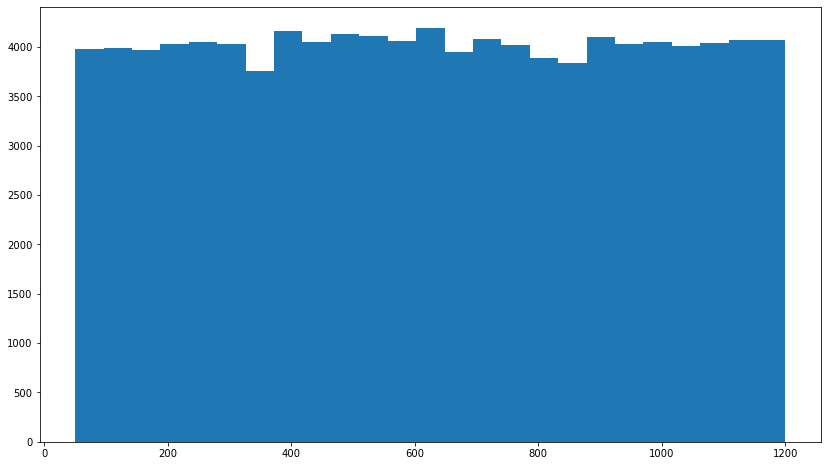

In [385]:
print ('Histogram of Price')
print (df['price'].agg({min,max,np.mean, np.median}))
plt.figure(figsize=(14,8))
plt.hist(x=df2['price'],bins=25);

In [386]:
df2['minimum nights'].value_counts().sort_index()

1.0     25373
2.0     23551
3.0     16079
4.0      6611
5.0      6038
6.0      1532
7.0      4027
8.0       245
9.0       157
10.0      934
11.0       56
12.0      172
13.0      106
14.0     1074
15.0      588
16.0       35
17.0       24
18.0       48
19.0       17
20.0      440
21.0      256
22.0       17
23.0       18
24.0       20
25.0      154
26.0       27
27.0       39
28.0      432
29.0      568
30.0    11611
Name: minimum nights, dtype: int64

Histogram of Minimum Nights


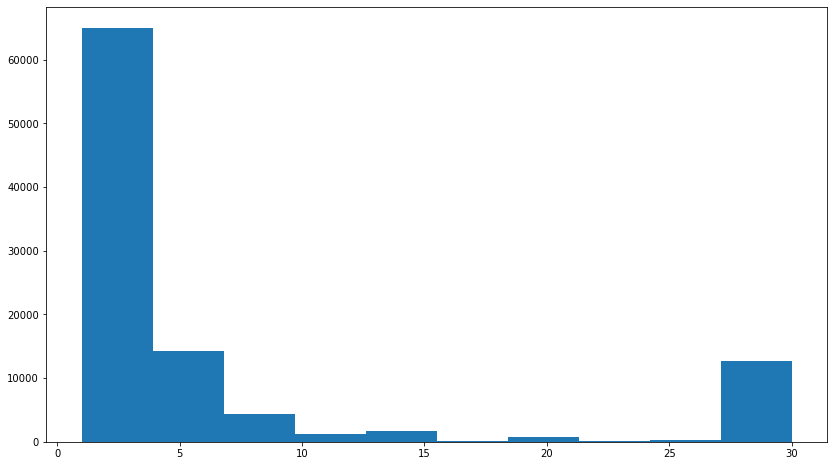

In [387]:
print ('Histogram of Minimum Nights')
plt.figure(figsize=(14,8))
plt.hist(x=df2['minimum nights'],bins=10);

Histogram of Number of Reviews


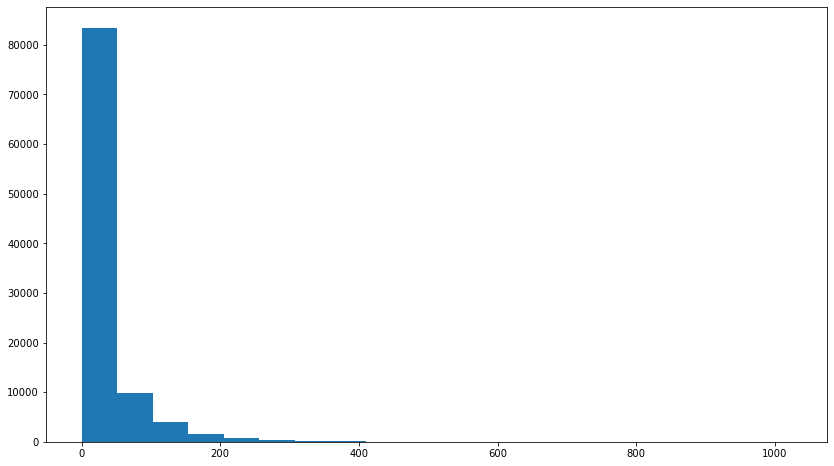

In [388]:
print ('Histogram of Number of Reviews')
plt.figure(figsize=(14,8))
plt.hist(x=df2['number of reviews'],bins=20);

### Questions that will be asked
* What are number of listings by Neighborhood Group/Neighborhood
* What about by Room Type
* Average Price by Room Type
* Average Price by Neighborhood Group/Neighborhood
* Correlation bw # of listings/review/rating?
* Correlation between Construction year and price?

### Number of listings by neighborhood group/neighborhood

Manhattan and Brooklyn, the two most populated borroughs, have the top 2 most listings, as they are the most desirable location for tourists. 

#### Price
The price seems to be the same through out each borrough. In the first glance, that might seem strange that they are essentially the same, but the thing about listings is that they keep a high overall price to protect against instant books (where the customer can book instantly) regardless if that feature is on or off. This isn't the actual price of the transaction as hosts tend to fluctuate prices depending on weekday and season. Thus, overall, the price does not add much value to the analysis.

In [389]:
dfng = df2.groupby('neighbourhood group')['id'].nunique().sort_values(ascending=False).to_frame('Listings')

dfng['Average Price'] = df2.groupby('neighbourhood group')['price'].mean().round(2)
dfng['Median Price'] = df2.groupby('neighbourhood group')['price'].median()
dfng

,Listings,Average Price,Median Price
neighbourhood group,,,
Manhattan,42558,622.60,621.0
Brooklyn,40953,626.85,626.0
Queens,13024,629.33,625.0
Bronx,2657,628.53,633.0
Staten Island,935,624.27,628.0


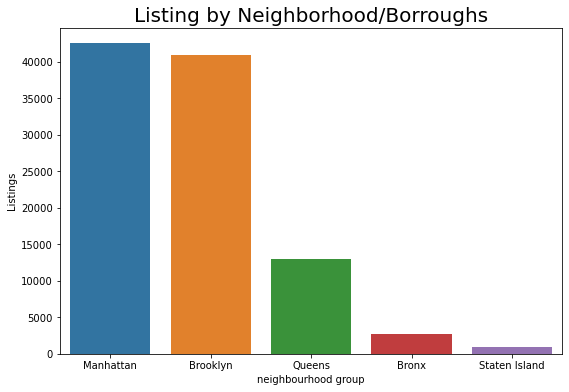

In [390]:
plt.figure(figsize=(9,6))
a = sns.barplot(x=dfng.index,y=dfng['Listings'])
a.set_title("Listing by Neighborhood/Borroughs", fontsize = 20)
plt.show()

In [391]:
dfn = df2.groupby('neighbourhood')['id'].nunique().to_frame('Listings')
dfn['Average Price'] = df2.groupby('neighbourhood')['price'].mean().round(2)
dfn['Median Price'] = df2.groupby('neighbourhood')['price'].median()
dfn.sort_values(by='Listings',ascending=False).head(20)

,Listings,Average Price,Median Price
neighbourhood,,,
Bedford-Stuyvesant,7786,624.17,622.0
Williamsburg,7603,626.29,628.0
Harlem,5328,625.58,618.0
Bushwick,4874,634.18,641.0
Hell's Kitchen,3881,619.73,616.0
Upper West Side,3752,616.69,619.0
Upper East Side,3518,618.61,626.0
East Village,3385,619.09,618.0
Midtown,3289,611.27,611.0


### Number of listings and price by roomtype

In [392]:
dfrt = df2.groupby('room type')['id'].nunique().sort_values(ascending=False).to_frame('Listings')

dfrt['Average Price'] = df2.groupby('room type')['price'].mean().round(2)
dfrt['Median Price'] = df2.groupby('room type')['price'].median()
dfrt

,Listings,Average Price,Median Price
room type,,,
Entire home/apt,52151,625.14,623.5
Private room,45693,625.21,623.0
Shared room,2168,632.77,650.0
Hotel room,115,668.47,644.5


In [393]:
dfrtn1 = df2.groupby(['neighbourhood group','room type'])['id'].nunique().sort_values(ascending=False).unstack().fillna(0)
dfrtn1

room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,994.0,0.0,1550.0,113.0
Brooklyn,20086.0,7.0,20052.0,808.0
Manhattan,25564.0,100.0,16014.0,880.0
Queens,5038.0,8.0,7626.0,352.0
Staten Island,469.0,0.0,451.0,15.0


Text(0, 0.5, 'Number of Listings')

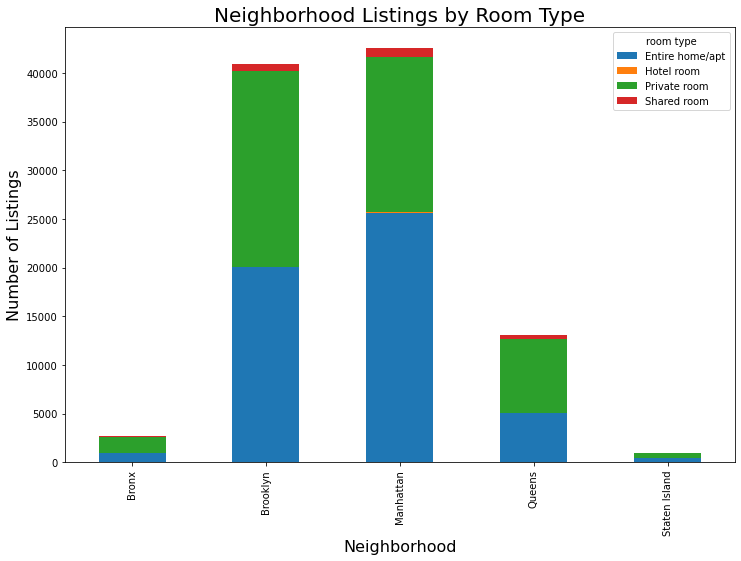

In [394]:
b = dfrtn1.plot(kind='bar', stacked=True,figsize=(12,8))
b.set_title('Neighborhood Listings by Room Type',fontsize=20)
b.set_xlabel('Neighborhood',fontsize=16)
b.set_ylabel('Number of Listings',fontsize=16)

In [395]:
dfrtn2 = df2.groupby(['neighbourhood group','room type'])['price'].mean().sort_values(ascending=False).unstack().fillna(0).round(2)
dfrtn2

room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,623.05,0.00,633.85,603.52
Brooklyn,626.99,736.12,626.38,634.19
Manhattan,623.25,681.87,620.76,630.31
Queens,626.16,433.25,631.07,641.69
Staten Island,642.62,0.00,602.43,715.60


#### Price
Again, prices for Entire home/Apt, Private Room, and Shared Room are similar in prices, which does not make sense as Entire home/Apt should be worth more than the private room and shared room. 

Same goes for average price by construction year (below). Obviously there isn't much disparity in prices by construction year. Though, the number of listings by constructino year seem uniformly distributed.

In [417]:
dfc = df2.groupby('Construction year')['id'].count().to_frame('Listings')
dfc['Average Price'] = df2.groupby('Construction year')['price'].mean().round(2)
dfc['Average Review Rating'] = df2.groupby('Construction year')['review rate number'].mean().round(2)
dfc

,Listings,Average Price,Average Review Rating
Construction year,,,
2003.0,5036,624.72,3.25
2004.0,4926,630.15,3.27
2005.0,5034,619.61,3.26
2006.0,5117,635.95,3.30
2007.0,5023,625.84,3.25
2008.0,5117,638.74,3.28
2009.0,5085,618.47,3.24
2010.0,5043,625.65,3.26
2011.0,4974,626.38,3.32


#### Review Rating
Given there are 40k listings in Manhattan and Brooklyn each, average review rating does not matter much, not even by construction year (above). The distributions of review rate number shows equal numbers for 2,3,4, and 5 ratings (below).

In [428]:
df2.groupby('neighbourhood group')['review rate number'].mean().round(2)

neighbourhood group
Bronx            3.34
Brooklyn         3.26
Manhattan        3.28
Queens           3.33
Staten Island    3.40
Name: review rate number, dtype: float64

In [427]:
df2.groupby('review rate number')['id'].count()

review rate number
1.0     8979
2.0    22695
3.0    22848
4.0    22896
5.0    22920
Name: id, dtype: int64

In [422]:
df2.groupby(['neighbourhood group','review rate number'])['id'].count().unstack()

review rate number,1.0,2.0,3.0,4.0,5.0
neighbourhood group,,,,,
Bronx,152,591,692,638,585
Brooklyn,3933,9364,9084,9431,9232
Manhattan,3940,9559,9751,9577,9820
Queens,900,2967,3103,3050,3034
Staten Island,54,214,218,200,249


### Conclusion

This exercise was primarily to get back into rhythm in performing EDA before tackling predictive exercises. This data set does not lend itself much to any key insights considering the listings and price were roughly the same distribution and same mean price by listings, construction year, review rate number. In fact, if there was actual transactions then we would most likely see some key insights interms of prices by neighborhoods, room types, number of rooms per unit